# Hyperparameter tuning for neural network

> Back Propagation Implementation - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

This notebook explores different combinations of hyperparameters to identify the best configuration for a neural network. 
We will evaluate at least 10 combinations of the following hyperparameters:

- **Number of layers**
- **Layer structure**
- **Number of epochs**
- **Learning rate**
- **Momentum**
- **Activation function**

Metrics evaluated:
- **Mean Absolute Percentage Error (MAPE)**
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

Plots included:
- Scatter plots of predicted vs true values for representative combinations.
- Training and validation loss evolution over epochs.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.NeuralNet import NeuralNet  # Import my neural network (BP) implementation

First of all, let's retrieve the processed dataset. We can do it by directly importing the previously splitted csv files (X_train,y_train,X_test, y_test) or the entire dataset and split it here. Since we have to convert Pandas dataframes into NumPy arrays, we will import the dataset because it will be easier to handle.

In [3]:
#read the csv data
X_train_pd = pd.read_csv('../data/X_train.csv')
X_test_pd = pd.read_csv('../data/X_test.csv')
y_train_pd = pd.read_csv('../data/y_train.csv')
y_test_pd = pd.read_csv('../data/y_test.csv')

Convert to arrays

In [4]:
# Convert X_train and X_test to NumPy arrays
X_train = X_train_pd.to_numpy()
X_test = X_test_pd.to_numpy()

# Assuming y_train and y_test have a single target column
y_train = y_train_pd.to_numpy().ravel()  # Use .ravel() to flatten to 1D array
y_test = y_test_pd.to_numpy().ravel()

# Verify the shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (8000, 9), y_train: (8000,)
X_test: (2000, 9), y_test: (2000,)


This function tries different combinations of hyperparameters for my neural network to determine the best configuration that minimizes prediction errors (MSE, MAE, MAPE). It evaluates the performance of each configuration on a validation dataset and collects the results.



In [5]:
def hyperparameter_search(X_train, y_train, X_val, y_val):
    hyperparameters = [
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "sigmoid"},
        {"layers": [9, 8, 4, 1], "epochs": 200, "lr": 0.1, "momentum": 0.2, "activation": "sigmoid"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "tanh"},
        {"layers": [9, 8, 4, 1], "epochs": 200, "lr": 0.1, "momentum": 0.2, "activation": "tanh"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "relu"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.2, "activation": "relu"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.8, "activation": "linear"},
        {"layers": [9, 8, 4, 1], "epochs": 100, "lr": 0.1, "momentum": 0.5, "activation": "sigmoid"},
        {"layers": [9, 16, 8, 1], "epochs": 100, "lr": 0.001, "momentum": 0.9, "activation": "tanh"},
        {"layers": [9, 16, 16, 8, 1], "epochs": 100, "lr": 0.01, "momentum": 0.5, "activation": "tanh"},
        {"layers": [9, 8, 4, 1], "epochs": 200, "lr": 0.01, "momentum": 0.9, "activation": "relu"},
        {"layers": [9, 12, 6, 1], "epochs": 150, "lr": 0.01, "momentum": 0.7, "activation": "sigmoid"},
        {"layers": [9, 32, 16, 1], "epochs": 150, "lr": 0.001, "momentum": 0.6, "activation": "tanh"},
        {"layers": [9, 10, 5, 1], "epochs": 120, "lr": 0.005, "momentum": 0.7, "activation": "sigmoid"},
        {"layers": [9, 32, 16, 8, 1], "epochs": 100, "lr": 0.01, "momentum": 0.8, "activation": "tanh"},
        {"layers": [9, 32, 16, 8, 1], "epochs": 200, "lr": 0.01, "momentum": 0.2, "activation": "tanh"}
    ]
    
    results = []
    
    for params in hyperparameters:
        # Unpack the parameters
        layers = params["layers"]
        epochs = params["epochs"]
        lr = params["lr"]
        momentum = params["momentum"]
        activation = params["activation"]
    
        print(f"Testing configuration: {params}")
    
        # Initialize and train the network
        nn = NeuralNet(layers, epochs, lr, momentum, activation, val_split=0.2)
        nn.fit(X_train, y_train)
    
        # Predict and evaluate
        y_pred = nn.predict(X_val)
        
        # Convert predictions and true values to numpy arrays
        y_val = np.array(y_val)
        y_pred = np.array(y_pred)
        
        # Mean Squared Error (MSE)
        total_error = 0
        for y_predicted, y_real in zip(y_pred, y_val):
            total_error += (y_real - y_predicted) ** 2
        mse = total_error / len(y_val)
        
        # Mean Absolute Error (MAE)
        total_error = 0
        for y_predicted, y_real in zip(y_pred, y_val):
            total_error += abs(y_real - y_predicted)
        mae = total_error / len(y_val)
        
        # Mean Absolute Percentage Error (MAPE)
        total_error = 0
        epsilon = 1e-7  # Avoid division by zero
        for y_predicted, y_real in zip(y_pred, y_val):
            if y_real != 0:
                total_error += abs((y_real - y_predicted) / (y_real + epsilon))
        mape = (total_error / len(y_val)) * 100
  
        # Store results
        results.append({
            "Layers": layers,
            "Epochs": epochs,
            "Learning Rate": lr,
            "Momentum": momentum,
            "Activation": activation,
            "MSE": mse,
            "MAE": mae,
            "MAPE": mape,

        })
    
    return pd.DataFrame(results)

In [6]:
results = hyperparameter_search(X_train, y_train, X_test, y_test)

# Sort and display results
results_sorted = results.sort_values(by="MSE", ascending=True)
print(results_sorted)

Testing configuration: {'layers': [9, 8, 4, 1], 'epochs': 100, 'lr': 0.1, 'momentum': 0.8, 'activation': 'sigmoid'}
Epoch 1/100, Train Loss: 0.055098603164829424, Val Loss: 0.059876465891967934
Epoch 2/100, Train Loss: 0.05320748327813723, Val Loss: 0.05803558686405285
Epoch 3/100, Train Loss: 0.012262954248888087, Val Loss: 0.013078766254321576
Epoch 4/100, Train Loss: 0.0055053650861585915, Val Loss: 0.005771754371480451
Epoch 5/100, Train Loss: 0.004322567424127307, Val Loss: 0.004498523414596517
Epoch 6/100, Train Loss: 0.003773247708462887, Val Loss: 0.003926606689888854
Epoch 7/100, Train Loss: 0.0035087941433231203, Val Loss: 0.003661345864783202
Epoch 8/100, Train Loss: 0.0033333133963984974, Val Loss: 0.003492179830826493
Epoch 9/100, Train Loss: 0.003199419338508546, Val Loss: 0.0033690756240233504
Epoch 10/100, Train Loss: 0.0031089689948100084, Val Loss: 0.0032913268806537836
Epoch 11/100, Train Loss: 0.0030634596364456684, Val Loss: 0.003257960391037506
Epoch 12/100, Train

Now, let's plot the scatter plot of the pedicted and true values and the training and validation loss. If there is a need to plot a specific plot, we cna just comment the configurations we don't want, and leave the desired one.

Best Parameters: Layers                     [9, 8, 4, 1]
Epochs                              200
Learning Rate                       0.1
Momentum                            0.2
Activation                      sigmoid
MSE              [0.001467174668429204]
MAE              [0.024643780886318217]
MAPE                [20.89379491424161]
Name: 1, dtype: object
Epoch 1/200, Train Loss: 0.05472735944230224, Val Loss: 0.059450345805245546
Epoch 2/200, Train Loss: 0.054333584834178786, Val Loss: 0.059058176668949275
Epoch 3/200, Train Loss: 0.05253952206560045, Val Loss: 0.057282905596860924
Epoch 4/200, Train Loss: 0.024165481975715296, Val Loss: 0.026014952168333372
Epoch 5/200, Train Loss: 0.007286162422025887, Val Loss: 0.007658413768410544
Epoch 6/200, Train Loss: 0.005453501401063138, Val Loss: 0.005655455657502945
Epoch 7/200, Train Loss: 0.004692046359117788, Val Loss: 0.004842957312978375
Epoch 8/200, Train Loss: 0.004174560130229953, Val Loss: 0.004304948346894244
Epoch 9/200, Train

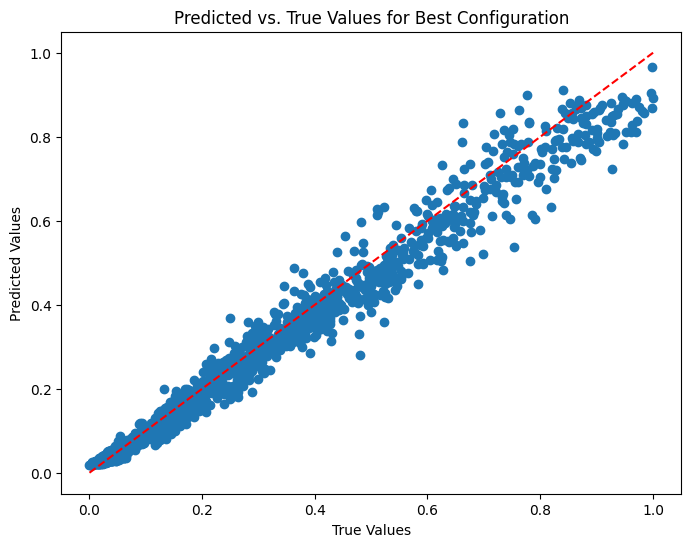

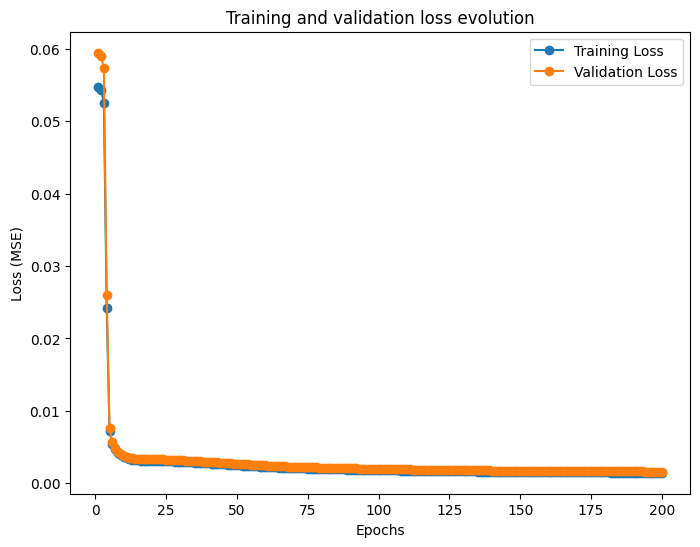

In [7]:
# Best configuration
best_params = results.loc[results["MSE"].idxmin()]
print("Best Parameters:", best_params)

# Scatter plot for best configuration
nn_best = NeuralNet(
    best_params["Layers"],
    best_params["Epochs"],
    best_params["Learning Rate"],
    best_params["Momentum"],
    best_params["Activation"],
    val_split=0.2
)
nn_best.fit(X_train, y_train)
y_best_pred = nn_best.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs. True Values for Best Configuration")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# Loss plot for best configuration
train_losses, val_losses = nn_best.loss_epochs()
epochs = range(1, len(train_losses) + 1)
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, label="Training Loss", marker='o')
plt.plot(epochs, val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training and validation loss evolution")
plt.legend()
plt.show()